# Advanced Data Science Project || By Ansh Dugar

### Topic: **Fraudulent Transaction Prediction using Machine Learning Alogrithms with HyperParameter Tuning**

# Data Extraction

#### We first import all the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

#### Using Pandas we now read the Data using read_csv which helps us read csv files with ease

In [2]:
df = pd.read_csv("Fraud_Data.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,1,1


# Data Exploration and Cleaning

#### Checking the shape of the dataset

In [3]:
df.shape

(6362620, 11)

#### Checking the info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### Describing the data

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,6.999448e-01,4.582817e-01,0.0,0.00,1.000,1.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.999807e-01,4.582492e-01,0.0,0.00,0.000,1.000000e+00,1.000000e+00


#### Now Checking for any Null Values

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### Checking the correlation between the variables with the target variable

In [7]:
df.corr()["isFraud"].sort_values()

newbalanceDest   -0.000225
oldbalanceDest   -0.000204
isFlaggedFraud   -0.000077
newbalanceOrig   -0.000052
oldbalanceOrg    -0.000038
amount            0.000017
step              0.000502
isFraud           1.000000
Name: isFraud, dtype: float64

#### Heatmap of the correlation between the variables with the target variable

[Text(0.5, 1.0, 'Correlation Plot')]

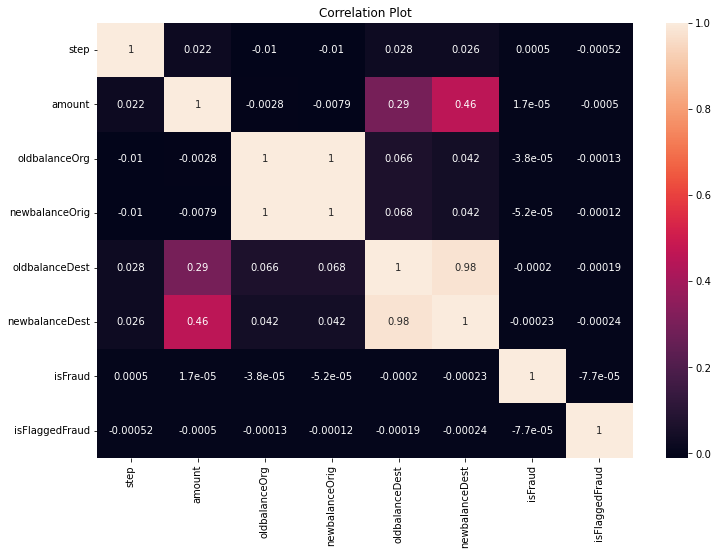

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True).set(title='Correlation Plot')

#### Checking the value counts in the target Variable
Here our target variable is the isfraud Column

In [9]:
target = "isFraud"
df[target].value_counts()

1    4453483
0    1909137
Name: isFraud, dtype: int64

/Users/manavhirey/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Fraud vs Non-Fraud Transactions')]

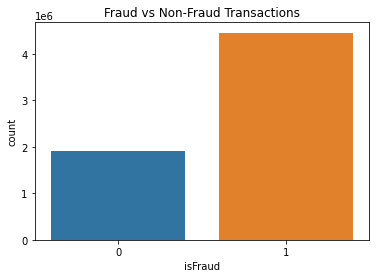

In [10]:
sns.countplot(df[target]).set(title='Fraud vs Non-Fraud Transactions')

#### Visualizing the number of transactions per type

[Text(0.5, 1.0, 'No of Transactions')]

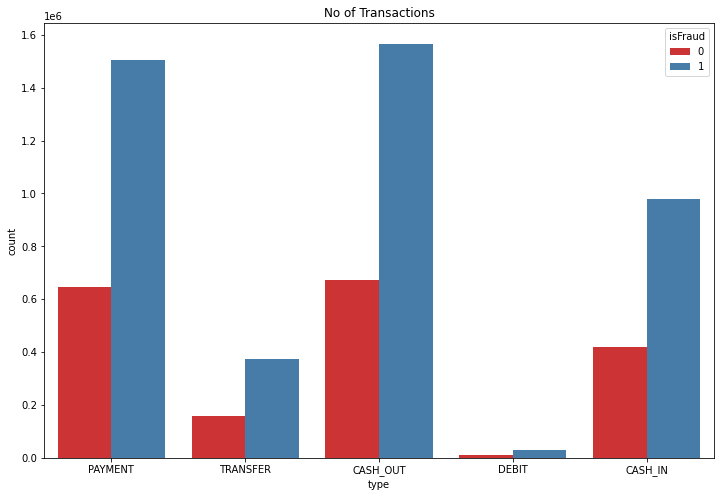

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="type", data=df,hue=target , palette="Set1").set(title='No of Transactions')

#### Previously when we checked for dtypes in the dataset we found that we have 3 Objects which we will have to convert

In [12]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


#### Here we use labelEncoder to convert them
Label Encoding is a popular encoding technique for handling categorical variables.

In [13]:
le = LabelEncoder()
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

#### We recheck it

In [14]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


#### Now we calculate the Variance Inflation Factor and drop certain columns accordingly
A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.

In [15]:
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df)

,variables,VIF
0,step,3.037123
1,type,4.585757
2,amount,4.085677
3,nameOrig,3.036091
4,oldbalanceOrg,493.070624
5,newbalanceOrig,498.452626
6,nameDest,3.307896
7,oldbalanceDest,72.444384
8,newbalanceDest,83.862187
9,isFraud,2.709923


#### Dropping the highest valued VIF and then creating 3 new columns to check the Frauds so that the VIF decreases

In [16]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['TransactionPath'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(df)

,variables,VIF
0,type,2.829163
1,amount,3.780329
2,isFraud,2.467723
3,isFlaggedFraud,1.360399
4,Actual_amount_orig,1.137837
5,Actual_amount_dest,3.707364
6,TransactionPath,3.444433


#### Scaling the Dataset using Standard Scaling

Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format: mean - 0 (zero) standard deviation - 1.

In [17]:
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["amount"].values.reshape(-1, 1))
df.drop(["amount"], inplace= True, axis= 1)

#### Chosing X and Y values 

In [18]:
y = df["isFraud"]
x = df.drop(["isFraud"], axis= 1)

#### Splitting the data into Test and Train using test_train_split

In [19]:
(X_train, X_test, Y_train, Y_test) = train_test_split(x, y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


# Developing Models

## Algorithm 1 : **Logistic Regression**

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. 

#### Create a logistic regression object

In [20]:
lr = LogisticRegression()

#### Train the model on the training set

In [21]:
lr.fit(X_train, Y_train)

LogisticRegression()

#### Now using the model we predict for both Testing and Training sets

In [22]:
pred1 = lr.predict(X_train)
pred2 = lr.predict(X_test)

#### Finding the f1 scores

The F1 score is a popular performance measure for classification and often preferred over, for example, accuracy when data is unbalanced, such as when the quantity of examples belonging to one class significantly outnumbers those found in the other class.

We have a very unbalanced set of data thats why we used **F1-scores as Performance Metric for all out Algorithms**

In [23]:
f1_score_LR_train_initial = f1_score(Y_train, pred1)
f1_score_LR_test_initial = f1_score(Y_test, pred2)

In [24]:
f1_score_LR_train_initial

0.823265486740865

In [25]:
f1_score_LR_test_initial

0.8231571553713193

#### Accuracy before Hyperparameter Tuning

In [26]:
accuracy_LR_initial = accuracy_score(Y_test, pred2)
accuracy_LR_initial

0.6995299630236181

#### Classification Report

In [27]:
print(classification_report(Y_train, pred1))
print(classification_report(Y_test, pred2))

              precision    recall  f1-score   support

           0       0.30      0.00      0.00   1336178
           1       0.70      1.00      0.82   3117656

    accuracy                           0.70   4453834
   macro avg       0.50      0.50      0.41   4453834
weighted avg       0.58      0.70      0.58   4453834

              precision    recall  f1-score   support

           0       0.30      0.00      0.00    572959
           1       0.70      1.00      0.82   1335827

    accuracy                           0.70   1908786
   macro avg       0.50      0.50      0.41   1908786
weighted avg       0.58      0.70      0.58   1908786



## Hyper-parameter tuning of Logistic Regression using **GridSearchCV**

In [28]:
scoring = {'AUC': 'roc_auc'}

logreg = LogisticRegression(max_iter=1000, solver='lbfgs', penalty='l2')

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(logreg, param_grid, cv=5, return_train_score=True,scoring=scoring, refit='AUC')

#### After forming the grid search model we fit the data with Training Sets

In [29]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}, refit='AUC',
             return_train_score=True, scoring={'AUC': 'roc_auc'})

#### Best Parameters 

In [30]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.001}


#### Best Score

In [31]:
print("Best score:", grid_search.best_score_)

Best score: 0.5001115489278259


#### Predicting on Test Data

In [32]:
y_pred = grid_search.best_estimator_.predict(X_test)

#### Accuracy after Hyperparameter Tuning

In [33]:
accuracy_LR_final = accuracy_score(Y_test, y_pred)
accuracy_LR_final

0.6995299630236181

#### Confusion Matrix

In [34]:
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[    430  572529]
 [   1004 1334823]]


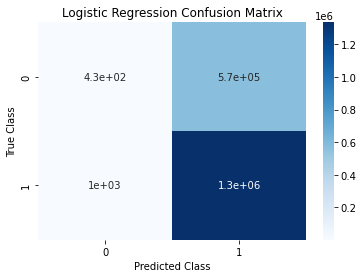

In [35]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

#### Create a classification report

In [36]:
cr = classification_report(Y_test, y_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.00      0.00    572959
           1       0.70      1.00      0.82   1335827

    accuracy                           0.70   1908786
   macro avg       0.50      0.50      0.41   1908786
weighted avg       0.58      0.70      0.58   1908786



#### Plotting Precision-Recall Graph

##### Obtain predicted probabilities of positive class

In [37]:
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:,1]


##### Calculate precision and recall values


In [38]:
precision, recall, _ = precision_recall_curve(Y_test, y_prob)

##### Calculate AUC score

In [39]:
auc_score = auc(recall, precision)

##### Graph

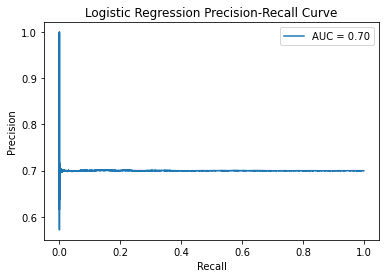

In [40]:
# Plot the precision-recall curve
plt.plot(recall, precision, label=f'AUC = {auc_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.legend()
plt.show()

#### Plotting F-1 Score Comparison

In [41]:
f1_score_LR_initial = f1_score(Y_test, pred2)
f1_score_LR_final = f1_score(Y_test, y_pred)

In [42]:
f1score_LR = pd.DataFrame([f1_score_LR_initial,f1_score_LR_final], columns = ["F-1 Score"])
f1score_LR['Type'] = ['Initial' , 'Final']
f1score_LR

,F-1 Score,Type
0,0.823157,Initial
1,0.823157,Final


[Text(0.5, 1.0, 'Logistic Regression F-1 Score Comparison')]

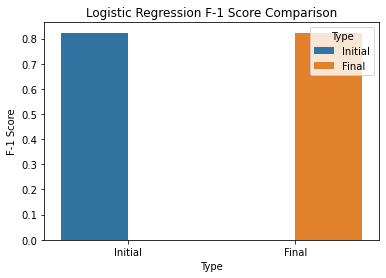

In [43]:
sns.barplot(data=f1score_LR, x="Type", y="F-1 Score", hue="Type").set(title = 'Logistic Regression F-1 Score Comparison')

#### Plotting Accuracy Comparisons

In [44]:
accuracy_LR = pd.DataFrame([accuracy_LR_initial,accuracy_LR_final], columns = ["Accuracy"])
accuracy_LR['Type'] = ['Initial' , 'Final']
accuracy_LR

,Accuracy,Type
0,0.69953,Initial
1,0.69953,Final


[Text(0.5, 1.0, 'Logistic Regression Accuracy Comparison')]

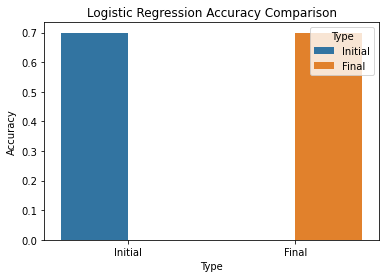

In [45]:
sns.barplot(data=accuracy_LR, x="Type", y="Accuracy", hue="Type").set(title = 'Logistic Regression Accuracy Comparison')

## Algorithm 2 : **Decision Tree Classification**

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. 

#### Create a Decision Tree Classifier object

In [46]:
dt = DecisionTreeClassifier()

#### Train the model on the training set

In [47]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

#### Now we predict it with the Testing set

In [48]:
y_test_pred = dt.predict(X_test)

#### Accuracy before Hyperparameter tuning

In [49]:
accuracy_DT_initial = accuracy_score(Y_test, y_test_pred)
accuracy_DT_initial

0.575647558186198

## Hyper-parameter tuning of Decision Tree Classification using **GridSearchCV**

#### Determining the Parameters

In [50]:
params = {
    'max_depth': [2, 3, 5],
    'min_samples_leaf': [5, 10, 20],
}

In [51]:
grid = GridSearchCV(estimator=dt,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)

#### Fitting the data using the Training Sets

In [52]:
grid.fit(X_train, Y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   4.5s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   4.3s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   4.3s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   4.2s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   4.2s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   4.3s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   4.3s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   4.4s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   4.3s
[CV] END ....................max_depth=2, min_samples_leaf=5; total time=   4.2s
[CV] END ...................max_depth=2, min_samples_leaf=10; total time=   4.2s
[CV] END ...................max_depth=2, min_sam

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [2, 3, 5],
                         'min_samples_leaf': [5, 10, 20]},
             verbose=2)

#### Now we predict it with the Testing set

In [53]:
y_test_pred_hyp = grid.predict(X_test)

In [54]:
accuracy_DT_final = accuracy_score(Y_test,y_test_pred_hyp)
accuracy_DT_final

0.6998270104663383

#### Confusion Matrix

In [55]:
cm = confusion_matrix(Y_test, y_test_pred_hyp)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[      3  572956]
 [     10 1335817]]


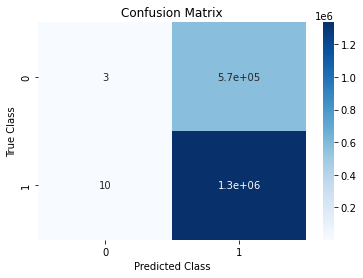

In [56]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

#### Creating a Classification Graph

In [57]:
cr = classification_report(Y_test, y_test_pred_hyp)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.00      0.00    572959
           1       0.70      1.00      0.82   1335827

    accuracy                           0.70   1908786
   macro avg       0.47      0.50      0.41   1908786
weighted avg       0.56      0.70      0.58   1908786



#### Plotting Precision Recall Graph

In [58]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

In [59]:
grid.best_score_

0.6999933091361003

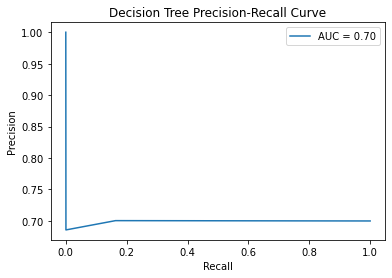

In [60]:
y_prob_dt = grid.best_estimator_.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(Y_test, y_prob_dt)

# Calculate AUC score
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, label=f'AUC = {auc_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision-Recall Curve')
plt.legend()
plt.show()

#### Plotting F-1 Score Comparison

In [61]:
f1_score_DT_initial = f1_score(Y_test,y_test_pred)
f1_score_DT_final = f1_score(Y_test,y_test_pred_hyp)

f1score_DT = pd.DataFrame([f1_score_DT_initial,f1_score_DT_final], columns = ["F-1 Score"])
f1score_DT['Type'] = ['Initial' , 'Final']
f1score_DT


,F-1 Score,Type
0,0.694800,Initial
1,0.823409,Final


[Text(0.5, 1.0, 'Decision Tree F-1 Score Comparison')]

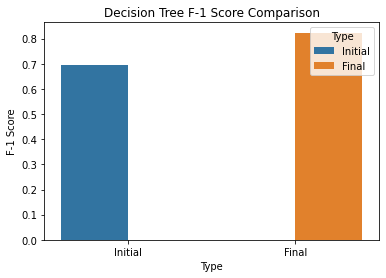

In [62]:
sns.barplot(data=f1score_DT, x="Type", y="F-1 Score", hue="Type").set(title = 'Decision Tree F-1 Score Comparison')

#### Plotting Accuracy Comparisions

In [63]:
accuracy_DT = pd.DataFrame([accuracy_DT_initial,accuracy_DT_final], columns = ["Accuracy"])
accuracy_DT['Type'] = ['Initial' , 'Final']
accuracy_DT

,Accuracy,Type
0,0.575648,Initial
1,0.699827,Final


[Text(0.5, 1.0, 'Decision Tree Accuracy Comparison')]

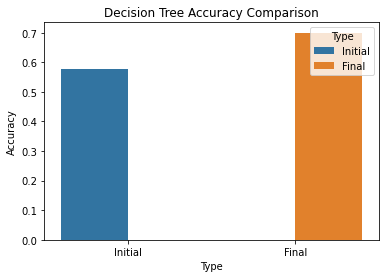

In [64]:
sns.barplot(data=accuracy_DT, x="Type", y="Accuracy", hue="Type").set(title = 'Decision Tree Accuracy Comparison')

## Algorithm 3 : **Gradient Boost**

The main idea behind this algorithm is to build models sequentially and these subsequent models try to reduce the errors of the previous model. But how do we do that? How do we reduce the error? This is done by building a new model on the errors or residuals of the previous model.

#### Creating the XGB Object

In [65]:
xgb_cl = xgb.XGBClassifier()

#### Using the model to fit with the train data

In [66]:
xgb_cl.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Predicting the model

In [67]:
preds = xgb_cl.predict(X_test)

#### Finding the accuracy

In [68]:
accuracy_XGB_initial = accuracy_score(Y_test, preds)
accuracy_XGB_initial

0.6998102458840331

#### Creating a function for Confusion Matrix

In [69]:
def get_confusion_matrix(true_y_classes_array, predicted_y_classes_array):
    unique_classes = np.unique(true_y_classes_array)
    unique_classes = unique_classes[::-1]
    confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))
    for i in range(len(unique_classes)):
        for j in range(len(unique_classes)):
            confusion_matrix[i, j] = np.sum((true_y_classes_array == unique_classes[j]) & (predicted_y_classes_array == unique_classes[i]))
    return confusion_matrix

#### Creating a function to generate Classification Report i.e f1 score, precision, recall

In [70]:
def get_report(binary_conf_matrix):
    true_negative  = binary_conf_matrix[1][1]    
    false_positive = binary_conf_matrix[0][1]
    false_negative = binary_conf_matrix[1][0]
    true_positive = binary_conf_matrix[0][0]

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive/ (true_positive + false_negative)
    
    f1_score = (2 * (precision * recall)) / (precision + recall )
    
    sum_all_elements_of_confusion_matrix = np.concatenate(binary_conf_matrix).sum()
    
    accuracy_score = (true_positive + true_negative)/sum_all_elements_of_confusion_matrix
    
    return precision, recall, f1_score, accuracy_score

#### Generating the confusion Matrix

In [71]:
confusion_matrix_5_a = get_confusion_matrix(Y_test, preds)
print(confusion_matrix_5_a)

[[1.335759e+06 5.729300e+05]
 [6.800000e+01 2.900000e+01]]


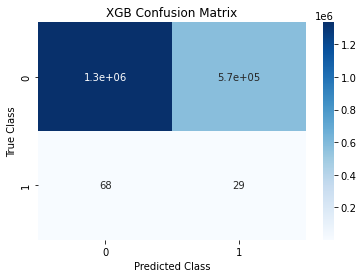

In [72]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(confusion_matrix_5_a, annot=True, cmap="Blues")
plt.title("XGB Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [73]:
classrep = classification_report(Y_test, preds)
print("Classification Report:\n", classrep)

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.00      0.00    572959
           1       0.70      1.00      0.82   1335827

    accuracy                           0.70   1908786
   macro avg       0.50      0.50      0.41   1908786
weighted avg       0.58      0.70      0.58   1908786



#### F-1 Score 

In [74]:
precision, recall, f1_score, accuracy = get_report(confusion_matrix_5_a)
f1_score_XGB_initial = f1_score

## Hyper-parameter tuning of XGBoost using **RandomSearch**

#### Creating the xgb object

In [75]:
classifier = xgb.XGBClassifier()

#### Determining the Parameters

In [76]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

#### Creating the Model for Random Search

In [77]:
rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)

#### Fitting the Model with the Training Data

In [78]:
rs_model.fit(X_train,Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 2/3] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.500 total time= 2.9min
[CV 2/3] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=7;, score=0.500 total time= 2.6min
[CV 1/3] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.499 total time= 2.9min
[CV 3/3] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=7;, score=0.500 total time= 2.6min


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

#### Finding the best Estimator of the Model

In [79]:
rs_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Predicting Test Data using the best Estimator

In [80]:
random_search = rs_model.best_estimator_
predict_random = random_search.predict(X_test)

#### Accuracy After Hyperparameter

In [81]:
accuracy_XGB_final = accuracy_score(Y_test, predict_random)
accuracy_XGB_final

0.6998259626799442

#### Confusion Matrix After Hyper-parameter Tuning

In [82]:
confusion_matrix_rs = get_confusion_matrix(Y_test, predict_random)
print(confusion_matrix_rs)

[[1.335813e+06 5.729540e+05]
 [1.400000e+01 5.000000e+00]]


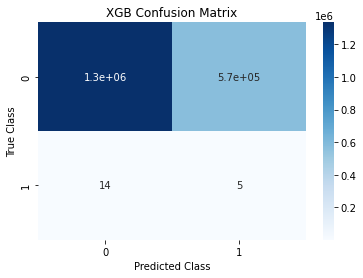

In [83]:
sns.heatmap(confusion_matrix_rs, annot=True, cmap="Blues")
plt.title("XGB Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

#### Plotting F-1 Score Comparision

In [84]:
precision_rs, recall_rs, f1_score_rs, accuracy_rs = get_report(confusion_matrix_rs)
f1_score_XGB_final = f1_score_rs

#### Comapring the F-1 Scores After Hyper Parameter Tuning

In [85]:
f1score_XGB = pd.DataFrame([f1_score_XGB_initial,f1_score_XGB_final], columns = ["F-1 Score"])
f1score_XGB['Type'] = ['Initial' , 'Final']
f1score_XGB

,F-1 Score,Type
0,0.823395,Initial
1,0.823408,Final


[Text(0.5, 1.0, 'XGB F-1 Score Comparison')]

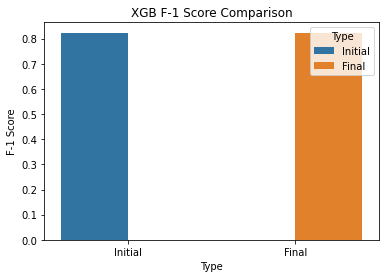

In [86]:
sns.barplot(data=f1score_XGB, x="Type", y="F-1 Score", hue="Type").set(title = 'XGB F-1 Score Comparison')

#### Plotting Accuracy Comparisions

In [87]:
accuracy_XGB = pd.DataFrame([accuracy_XGB_initial,accuracy_XGB_final], columns = ["Accuracy"])
accuracy_XGB['Type'] = ['Initial' , 'Final']
accuracy_XGB

,Accuracy,Type
0,0.699810,Initial
1,0.699826,Final


[Text(0.5, 1.0, 'XGB Accuracy Comparison')]

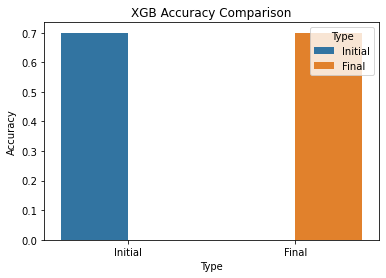

In [88]:
sns.barplot(data=accuracy_XGB, x="Type", y="Accuracy", hue="Type").set(title = 'XGB Accuracy Comparison')

#### Plotting the Precision Recall Graph

In [89]:
y_prob_xgb = random_search.predict_proba(X_test)[:,1]

In [90]:
precision, recall, _ = precision_recall_curve(Y_test, y_prob_xgb)

In [91]:
auc_score = auc(recall, precision)

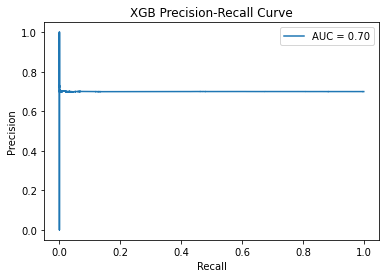

In [92]:
# Plot the precision-recall curve
plt.plot(recall, precision, label=f'AUC = {auc_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGB Precision-Recall Curve')
plt.legend()
plt.show()

# Results and Conclusion

## Comparing the F-1 Scores of All Algorithm Used

[Text(0.5, 1.0, 'F-1 Score before Hyperparametertuning of all Algorithms')]

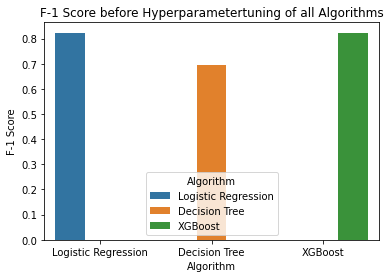

In [93]:
f1_score_initial= pd.DataFrame([f1_score_LR_initial,f1_score_DT_initial,f1_score_XGB_initial], columns = ["F-1 Score"])
f1_score_initial['Algorithm'] = ['Logistic Regression' , 'Decision Tree', 'XGBoost']
f1_score_initial
sns.barplot(data=f1_score_initial, x="Algorithm", y="F-1 Score", hue="Algorithm").set(title = 'F-1 Score before Hyperparametertuning of all Algorithms')


In [94]:
f1_score_initial

,F-1 Score,Algorithm
0,0.823157,Logistic Regression
1,0.694800,Decision Tree
2,0.823395,XGBoost


[Text(0.5, 1.0, 'F-1 Score after Hyperparametertuning of all Algorithms')]

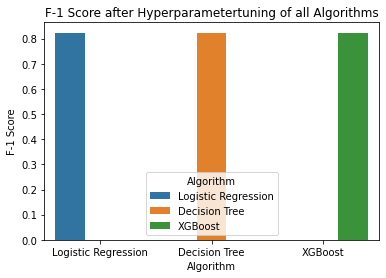

In [95]:
f1_score_final= pd.DataFrame([f1_score_LR_final,f1_score_DT_final,f1_score_XGB_final], columns = ["F-1 Score"])
f1_score_final['Algorithm'] = ['Logistic Regression' , 'Decision Tree', 'XGBoost']
f1_score_final
sns.barplot(data=f1_score_final, x="Algorithm", y="F-1 Score", hue="Algorithm").set(title = 'F-1 Score after Hyperparametertuning of all Algorithms')

In [96]:
f1_score_final

,F-1 Score,Algorithm
0,0.823157,Logistic Regression
1,0.823409,Decision Tree
2,0.823408,XGBoost


## Comparing the Accuracy of All Algorithm Used

[Text(0.5, 1.0, 'Accuracy before Hyperparametertuning of all Algorithms')]

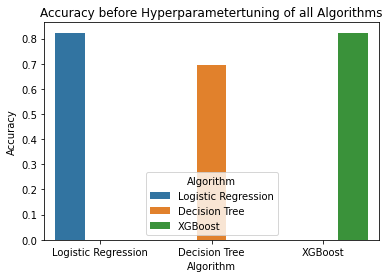

In [97]:
accuracy_initial= pd.DataFrame([f1_score_LR_initial,f1_score_DT_initial,f1_score_XGB_initial], columns = ["Accuracy"])
accuracy_initial['Algorithm'] = ['Logistic Regression' , 'Decision Tree', 'XGBoost']
accuracy_initial
sns.barplot(data=accuracy_initial, x="Algorithm", y="Accuracy", hue="Algorithm").set(title = 'Accuracy before Hyperparametertuning of all Algorithms')

In [98]:
accuracy_initial

,Accuracy,Algorithm
0,0.823157,Logistic Regression
1,0.694800,Decision Tree
2,0.823395,XGBoost


[Text(0.5, 1.0, 'Accuracy after Hyperparametertuning of all Algorithms')]

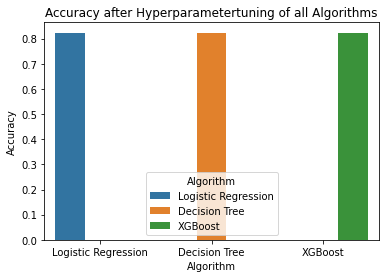

In [99]:
accuracy_final= pd.DataFrame([f1_score_LR_final,f1_score_DT_final,f1_score_XGB_final], columns = ["Accuracy"])
accuracy_final['Algorithm'] = ['Logistic Regression' , 'Decision Tree', 'XGBoost']
accuracy_final
sns.barplot(data=accuracy_final, x="Algorithm", y="Accuracy", hue="Algorithm").set(title = 'Accuracy after Hyperparametertuning of all Algorithms')

In [100]:
accuracy_final

,Accuracy,Algorithm
0,0.823157,Logistic Regression
1,0.823409,Decision Tree
2,0.823408,XGBoost


[CV 2/3] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.501 total time= 9.1min
[CV 3/3] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.500 total time= 9.1min
[CV 1/3] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=1;, score=0.501 total time= 9.1min
[CV 3/3] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=7;, score=0.500 total time= 2.9min
[CV 1/3] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=3;, score=0.500 total time= 6.8min
[CV 2/3] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.500 total time= 2.4min
[CV 3/3] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=1;, score=0.500 total time= 2.2min
[CV 2/3] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.3, max_depth=8, min_chi